# Change of error and structure over generation from Kirby, Cornish & Smith (2008)

This notebook uses the error and structure scores over generations in the KCS paper and asks the question: how do they change over time? It assumes there is a CSV file called `error.csv` that has the error scores in it, and one called `structure.csv` that has the structure scores. You'll need to make sure you get your input files in the right format to run these measures on.

## Setup

First load `ggplot2` and `Hmisc` for plotting and `lme4` for carrying out the mixed effects regressions.

In [6]:
if (!require(ggplot2)) {install.packages("ggplot2"); library(ggplot2)}
if (!require(Hmisc)) {install.packages("Hmisc"); library(Hmisc)}
if (!require(lme4)) {install.packages("lme4"); library(lme4)}

Loading required package: ggplot2
Loading required package: Hmisc
Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, units

Loading required package: lme4
Loading required package: Matrix


## Error analysis

First load in the error scores and have a look at them.

In [27]:
error <- read.csv("error.csv")
error

condition,chain,generation,error
filtered,a,0,0.6406526
filtered,a,1,0.4733646
filtered,a,2,0.2817260
filtered,a,3,0.1990741
filtered,a,4,0.2669753
filtered,a,5,0.2746914
filtered,a,6,0.1203704
filtered,a,7,0.2244268
filtered,a,8,0.2515432
filtered,a,9,0.2899030


We'll plot a graph showing how error changes over generations in the two experiments (which we're calling "conditions" here). This graph shows the mean across chains and the error bars are 95% confidence intervals around that mean. These are calculated using a "bootstrap" method, in which a new random sample of error scores is created (by picking randomly from the chains with replacement) and the mean for that calculated loads of times. This gives us a sense of what the range of likely error scores might be.

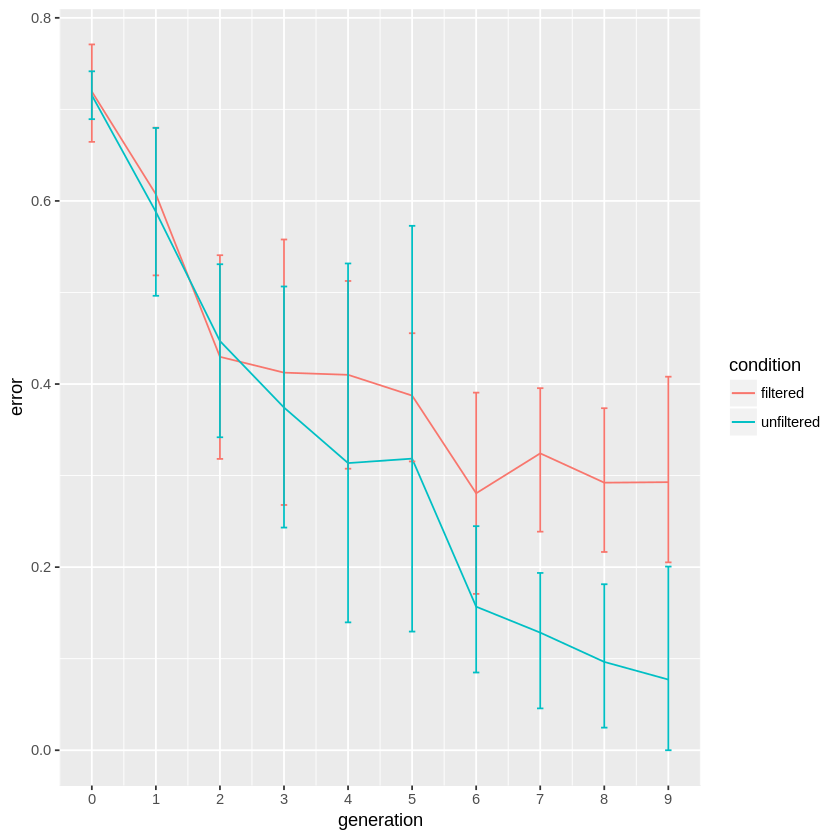

In [28]:
ggplot(error,aes(x=generation,y=error,color=condition))+
  stat_summary(fun.y=mean,geom='line')+
  stat_summary(fun.data=mean_cl_boot,geom='errorbar',width=0.1)+
  scale_x_continuous(breaks=seq(0,9,1))

### Stats

We're going to run a linear mixed effects model in which we try to predict the error from the generation number and the condition. We're going to allow for the possibility that generation and chain *interact*. That is, the possibility of the rate of change of error over generations being different in the two conditions (rather than just the overal level of error being shifted up or down.

These mixed effects models allow us to control for the possibility that different chains behave differently too. Here we allow for the possibility that each chain has an overall level of error that is shifted up or down. (This is called a "random intercept model". We could also try something more sophisticated and allow for a different rate of change in each chain too. However, this can cause the model to not be able to find a solution, so we're going for a simpler model for now.)

The specification of the model is:

`error ~ generation * condition + (1 | chain)`

This means we are predicting `error` based on an `generation` and `condition` (and their interaction, which is what the `*` does), and we're allowing different `chain`s to behave differently with respect to error. The `(1 | chain)` bit is what tells the model to fit different random intercepts for different chains.


In [29]:
error_model <- lmer(error ~ generation*condition + (1|chain), data=error)
summary(error_model)

Linear mixed model fit by REML ['lmerMod']
Formula: error ~ generation * condition + (1 | chain)
   Data: error

REML criterion at convergence: -86.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.02493 -0.64786  0.00961  0.72023  2.81459 

Random effects:
 Groups   Name        Variance Std.Dev.
 chain    (Intercept) 0.006098 0.07809 
 Residual             0.012675 0.11258 
Number of obs: 80, groups:  chain, 8

Fixed effects:
                                Estimate Std. Error t value
(Intercept)                     0.606277   0.051177  11.847
generation                     -0.042365   0.006198  -6.836
conditionunfiltered             0.026931   0.072375   0.372
generation:conditionunfiltered -0.026884   0.008765  -3.067

Correlation of Fixed Effects:
            (Intr) genrtn cndtnn
generation  -0.545              
cndtnnfltrd -0.707  0.385       
gnrtn:cndtn  0.385 -0.707 -0.545

The most important bit here is the fixed effects table. (The fixed effects are the things we're using to predict the error score, namely generation and condition). 

The first row (the intercept) estimates the overall level of error at generation zero **for the "default" condition from the model**. The default here is the filtered condition, which you can tell because the fixed effects table has a row for the non-default condition: "conditionunfiltered". You really want to make sure that your new version of the experiment is the default level (because you want to be able to say what is happening in your experiment rather than just how it compares with the previous one). To do this, you can use the 'relevel' function in R to change the order of the levels. Or, you can make sure your condition name is first alphabetically since this is the way that R chooses the default level!

You can also use a function called "contrasts" to change things so that you can report the overall mean of your results, but this is beyond the scope of this example.

Note this intercept is not the same as the actual average error we get a generation zero, because it takes into account the generations that came later. This is a *linear* model, which means it's trying to fit straight lines over our data. This necessarily means that where these lines intercept the axis at generation zero might vary. The model is estimating an intercept of 0.61. The std error column tells us how accurate this estimate is. So, the estimate is really $0.61 \pm 0.051$ standard errors.

The second row tells us the rate of change in error over generations for the filtered condition. So, error decreases over time (by 0.0424 per generation).

The third row tells us that the unfiltered condition has a higher intercept than the mean (but notice that the error on this is huge, it's 0.027 plus or minus 0.072 so actually it could be lower than the mean, potentially).

The final row tells us that the effect of generation is even more pronounced in the unfiltered condition. In other words, error goes down 0.027 per generation *more* than for the filtered condition.

### Comparing models

This is all well and good, but at this point it's really just describing stuff we can see on the graph. The reason to run models like this is to help us understand whether the size of these effects is what we might expect by chance. For example, we could get different overall levels of error just by luck in our two conditions. After all, it does look pretty variable!

There are a bunch of different ways of testing this, but one approach that I like is called *model comparison*. What this does is let you compare a model that you've created using the predictors you think are important, with another model that takes one of these predictors out as if it wasn't there. If the model that removes the predictor *explains the data* (e.g. predicts the error score) just as well as the one you ran originally, then you can conclude that your predictor wasn't really doing anything.

Here are three models that are simpler than our full model that we might want to compare with it. The first leaves out generation. The second leaves out condition. The third takes out the possibility of an interaction.

In [30]:
error_model_nogen <- lmer(error ~ condition + (1|chain), data=error)
error_model_nocond <- lmer(error ~ generation + (1|chain), data=error)
error_model_noint <- lmer(error ~ generation + condition + (1|chain), data=error)

Now we need a way of comparing each of these with our full model. R provides a function to do this (called `anova` but don't mistake this with running an ANOVA in the traditional sense, if you've done that in the past!).

The `Df` column in the resulting tables tells you the "degrees of freedom" in these models. The simpler model is simpler in each case in that it has fewer degrees of freedom. The `Chi Df` column gives you the difference in degrees of freedom and you'll report this as part of the write up (see below). The crucial number is in the `Chisq` column. This is the so-called chi-squared value saying how big the difference is between these two models in terms of how well they predict the data. R uses the chi-squared value and the degrees of freedom to estimate the probability that this difference in predictive success of the models could have been due to chance. This is the p-value reported in the final column. If it's a lot smaller than zero, then it might be reported using a notation with an `e` in it. For example, `1.5e-20` This is shorthand for the number of decimal places to move the number reported to get the real value. You see this written as $1.5\times 10^{-20}$ in papers, which just means $0.000000000000000000015$ (there are 20 zeros there, including the one on the left of the decimal point!)

In [31]:
anova(error_model, error_model_nogen)
anova(error_model, error_model_nocond)
anova(error_model, error_model_noint)

refitting model(s) with ML (instead of REML)


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
error_model_nogen,4,-15.48394,-5.955837,11.74197,-23.48394,NA,NA,NA
error_model,6,-100.67179,-86.379635,56.33590,-112.67179,89.18785,2,4.296395e-20


refitting model(s) with ML (instead of REML)


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
error_model_nocond,4,-92.89798,-83.36987,50.44899,-100.8980,NA,NA,NA
error_model,6,-100.67179,-86.37963,56.33590,-112.6718,11.77381,2,0.002775549


refitting model(s) with ML (instead of REML)


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
error_model_noint,5,-93.59159,-81.68146,51.79579,-103.5916,NA,NA,NA
error_model,6,-100.67179,-86.37963,56.33590,-112.6718,9.080205,1,0.002583911


OK... what do we conclude from these tables?

All the p-values are lower than $0.05$ which by convention allows us to call them "significant". This means that we'd be able to say that there is a significant effect of generation on error scores, that there is a significant effect of condition on error scores, and that there is a significant interaction between generation and condition on error.

So, how do we report these? Well... it's tempting to just include everything, but in fact I think it's much better to report only the stats that are relevant to the predictions you're making. In the original paper we weren't interested in the difference between conditions (that's why we treated them as two different experiments) but let's imagine we were predicting a difference. We'd want to report both the effect of generation and the effect of condition. Also, the experiments are designed to all start in roughly the same place, so we really do expect a difference in rate of change over generations if there is a difference in conditions, so it's really the interaction that's important.

Here's how I would report these results (based on the *brilliant* tutorial [Winter, 2013](http://arxiv.org/pdf/1308.5499.pdf)):

"We used R (R Core Team, 2017) and lme4 (Bates, Maechler, Bolker & Walker 2014) to perform a linear mixed effects analysis of the relationship between error, generation, and condition. As fixed effects, we entered generation and condition (plus their interaction) into the model. As random effects, we had intercepts for chains. We found that generation affected error ($\chi^2(2)=89.19, p=4.3\times 10^{-20}$), lowering it by approximately $0.042 \pm 0.0062$ (standard errors) every generation in the filtered condition. We also found a significant interaction between generation and condition ($\chi^2(1)=9.08, p=0.0026$), with error decreasing approximately $0.027 \pm 0.0088$ (standard errors) more every generation for the unfiltered condition than the filtered condition." 

### A worry about the first generation...

For this kind of iterated learning experiment it's worth worrying a bit about the very first generation. After all, this is kind of a special case, because it's the language *we* made up, rather than the one the participants created. Because of this, you might sometimes also see the stats reported with the first generation taken out. Here's how you do it.

In [32]:
error_model <- lmer(error ~ generation*condition + (1|chain), data=subset(error, generation>0))
summary(error_model)

error_model_nogen <- lmer(error ~ condition + (1|chain), data=subset(error, generation>0))
error_model_nocond <- lmer(error ~ generation + (1|chain), data=subset(error, generation>0))
error_model_noint <- lmer(error ~ generation + condition + (1|chain), data=subset(error, generation>0)) 

anova(error_model, error_model_nogen)
anova(error_model, error_model_nocond)
anova(error_model, error_model_noint)

Linear mixed model fit by REML ['lmerMod']
Formula: error ~ generation * condition + (1 | chain)
   Data: subset(error, generation > 0)

REML criterion at convergence: -81

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.91097 -0.70766 -0.01066  0.65168  2.84626 

Random effects:
 Groups   Name        Variance Std.Dev.
 chain    (Intercept) 0.007662 0.08753 
 Residual             0.011483 0.10716 
Number of obs: 72, groups:  chain, 8

Fixed effects:
                                Estimate Std. Error t value
(Intercept)                     0.546526   0.058570   9.331
generation                     -0.032931   0.006917  -4.761
conditionunfiltered             0.043270   0.082831   0.522
generation:conditionunfiltered -0.029464   0.009782  -3.012

Correlation of Fixed Effects:
            (Intr) genrtn cndtnn
generation  -0.590              
cndtnnfltrd -0.707  0.418       
gnrtn:cndtn  0.418 -0.707 -0.590

refitting model(s) with ML (instead of REML)


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
error_model_nogen,4,-35.00578,-25.89911,21.50289,-43.00578,NA,NA,NA
error_model,6,-94.05103,-80.39104,53.02552,-106.05103,63.04526,2,2.041251e-14


refitting model(s) with ML (instead of REML)


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
error_model_nocond,4,-86.59741,-77.49075,47.29870,-94.59741,NA,NA,NA
error_model,6,-94.05103,-80.39104,53.02552,-106.05103,11.45362,2,0.003257445


refitting model(s) with ML (instead of REML)


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
error_model_noint,5,-87.31081,-75.92748,48.65541,-97.31081,NA,NA,NA
error_model,6,-94.05103,-80.39104,53.02552,-106.05103,8.740221,1,0.003112668


## Structure analysis

Here's all the same stuff, but for structure...

In [33]:
structure <- read.csv("structure.csv")
structure

condition,chain,generation,structure
filtered,a,0,1.1969130
filtered,a,1,1.1167490
filtered,a,2,8.3790840
filtered,a,3,8.5127290
filtered,a,4,12.1127800
filtered,a,5,10.4219100
filtered,a,6,8.8486110
filtered,a,7,11.3477200
filtered,a,8,8.2405400
filtered,a,9,7.7548540


Warning message:
“Removed 2 rows containing non-finite values (stat_summary).”Warning message:
“Removed 2 rows containing non-finite values (stat_summary).”

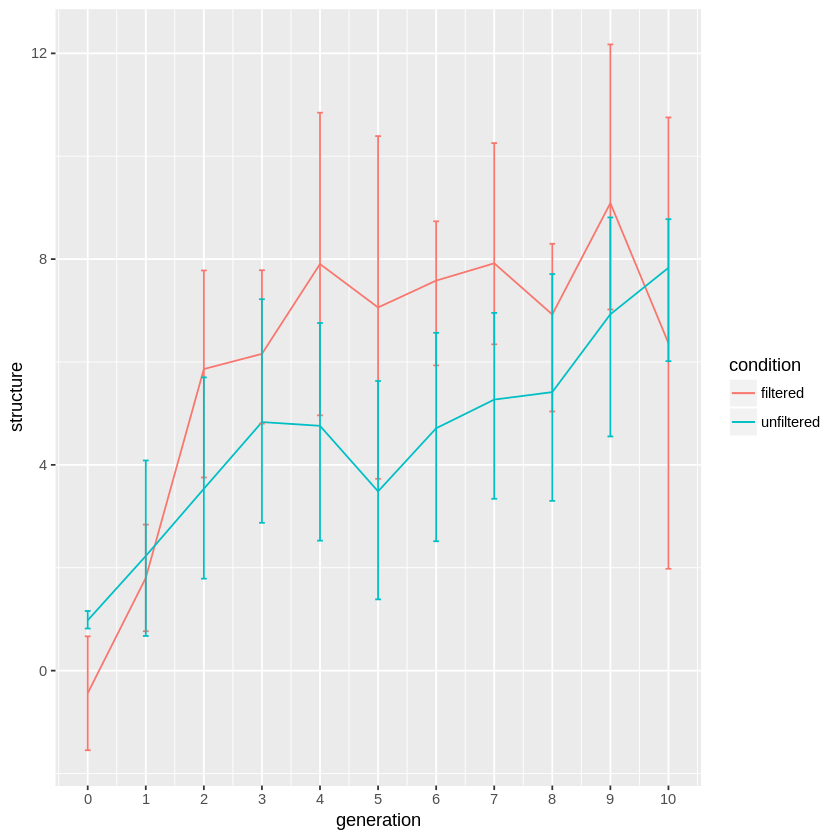

In [34]:
ggplot(structure,aes(x=generation,y=structure,color=condition))+
  stat_summary(fun.y=mean,geom='line')+
  stat_summary(fun.data=mean_cl_boot,geom='errorbar',width=0.1)+
  scale_x_continuous(breaks=seq(0,10,1))

Note that there are missing values here, hence the warning message! Sometimes you cannot calculate a structure score for a language (for example, if every object has the same label) and these are entered as `NA` in the spreadsheet.

In [35]:
structure_model <- lmer(structure ~ generation*condition + (1|chain), data=structure)
summary(structure_model)

structure_model_nogen <- lmer(structure ~ condition + (1|chain), data=structure)
structure_model_nocond <- lmer(structure ~ generation + (1|chain), data=structure)
structure_model_noint <- lmer(structure ~ generation + condition + (1|chain), data=structure) 

anova(structure_model, structure_model_nogen)
anova(structure_model, structure_model_nocond)
anova(structure_model, structure_model_noint)

Linear mixed model fit by REML ['lmerMod']
Formula: structure ~ generation * condition + (1 | chain)
   Data: structure

REML criterion at convergence: 408.1

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.15651 -0.49535  0.07045  0.50268  2.30471 

Random effects:
 Groups   Name        Variance Std.Dev.
 chain    (Intercept) 1.639    1.28    
 Residual             6.053    2.46    
Number of obs: 86, groups:  chain, 8

Fixed effects:
                               Estimate Std. Error t value
(Intercept)                      2.8593     0.9441   3.029
generation                       0.6323     0.1173   5.391
conditionunfiltered             -0.9263     1.3401  -0.691
generation:conditionunfiltered  -0.1254     0.1709  -0.734

Correlation of Fixed Effects:
            (Intr) genrtn cndtnn
generation  -0.621              
cndtnnfltrd -0.704  0.438       
gnrtn:cndtn  0.426 -0.686 -0.621

refitting model(s) with ML (instead of REML)


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
structure_model_nogen,4,450.6161,460.4335,-221.3080,442.6161,NA,NA,NA
structure_model,6,417.4729,432.1990,-202.7364,405.4729,37.14317,2,8.599286e-09


refitting model(s) with ML (instead of REML)


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
structure_model_nocond,4,416.4732,426.2906,-204.2366,408.4732,NA,NA,NA
structure_model,6,417.4729,432.1990,-202.7364,405.4729,3.000347,2,0.2230915


refitting model(s) with ML (instead of REML)


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
structure_model_noint,5,415.9982,428.270,-202.9991,405.9982,NA,NA,NA
structure_model,6,417.4729,432.199,-202.7364,405.4729,0.5253197,1,0.4685812


We'd report it as follows:

"As with our analysis of error, we performed a linear mixed effects analysis of the relationship between structure, generation, and condition. As fixed effects, we entered generation and condition (plus their interaction) into the model. As random effects, we had intercepts for chains. We found that generation affected structure ($\chi^2(2)=37.14, p=8.6\times 10^{-9}$), increasing it by approximately $0.63 \pm 0.12$ (standard errors) every generation in the filtered condition. We failed to find a significant interaction between generation and condition ($\chi^2(1)=0.53, p=0.46$), nor a significant overall effect of condition ($\chi^2(2)=3.00, p=0.22$)." 

Here are the same stats taking out the first generation, which you could also choose to report.

In [36]:
structure_model <- lmer(structure ~ generation*condition + (1|chain), data=subset(structure, generation>0))
summary(structure_model)

structure_model_nogen <- lmer(structure ~ condition + (1|chain), data=subset(structure, generation>0))
structure_model_nocond <- lmer(structure ~ generation + (1|chain), data=subset(structure, generation>0))
structure_model_noint <- lmer(structure ~ generation + condition + (1|chain), data=subset(structure, generation>0))

anova(structure_model, structure_model_nogen)
anova(structure_model, structure_model_nocond)
anova(structure_model, structure_model_noint)

Linear mixed model fit by REML ['lmerMod']
Formula: structure ~ generation * condition + (1 | chain)
   Data: subset(structure, generation > 0)

REML criterion at convergence: 365.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9733 -0.5130  0.1016  0.5381  2.2167 

Random effects:
 Groups   Name        Variance Std.Dev.
 chain    (Intercept) 1.988    1.410   
 Residual             5.584    2.363   
Number of obs: 78, groups:  chain, 8

Fixed effects:
                               Estimate Std. Error t value
(Intercept)                      4.3984     1.0717   4.104
generation                       0.4124     0.1301   3.170
conditionunfiltered             -1.9819     1.5246  -1.300
generation:conditionunfiltered   0.0199     0.1900   0.105

Correlation of Fixed Effects:
            (Intr) genrtn cndtnn
generation  -0.668              
cndtnnfltrd -0.703  0.469       
gnrtn:cndtn  0.457 -0.685 -0.670

refitting model(s) with ML (instead of REML)


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
structure_model_nogen,4,389.2949,398.7218,-190.6475,381.2949,NA,NA,NA
structure_model,6,375.1447,389.2849,-181.5723,363.1447,18.15025,2,0.0001144783


refitting model(s) with ML (instead of REML)


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
structure_model_nocond,4,374.1759,383.6028,-183.0880,366.1759,NA,NA,NA
structure_model,6,375.1447,389.2849,-181.5723,363.1447,3.031259,2,0.2196698


refitting model(s) with ML (instead of REML)


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
structure_model_noint,5,373.1602,384.9437,-181.5801,363.1602,NA,NA,NA
structure_model,6,375.1447,389.2849,-181.5723,363.1447,0.01550894,1,0.9008918
